In [1]:
import os
import tarfile
from six.moves import urllib 

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL , housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path,filter="data")
    housing_tgz.close()
    os.remove(tgz_path)


In [2]:
import pandas as pd


def load_housing_data (housing_path=HOUSING_PATH,file_name = "housing.csv"):
    data_file_path = os.path.join(housing_path,file_name)
    return pd.read_csv(data_file_path)
    
# fetch_housing_data()
data = load_housing_data()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

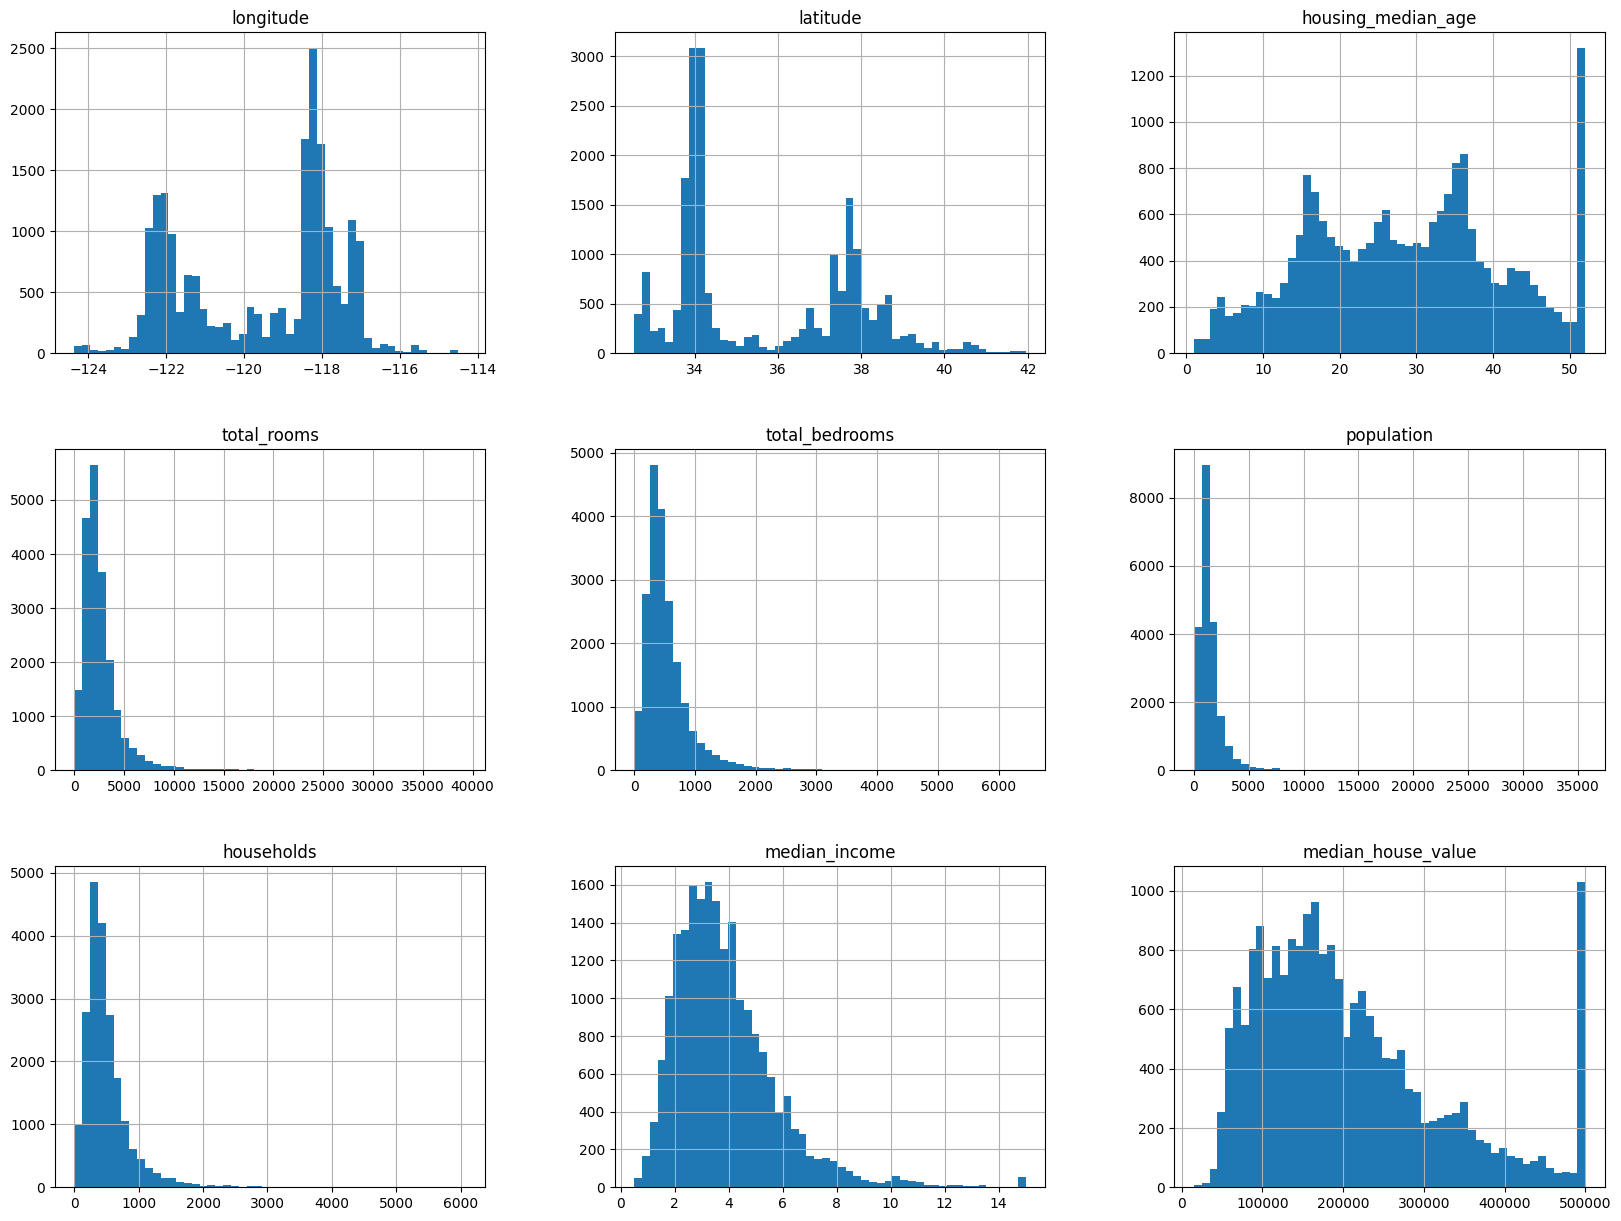

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(20,15))
plt.show()

In [7]:
import numpy as np 
import math

def generate_test_and_training_set(data,test_percentage=20):
    np.random.seed(69)
    data_len = len(data)
    random_indices = np.random.permutation(data_len)
    test_set_index = math.floor((data_len*test_percentage)/100)
    test_data = random_indices[:test_set_index]
    training_data = random_indices[test_set_index:]
    return data.iloc[test_data] , data.iloc[training_data]
test_data,training_data = generate_test_and_training_set(data)
print(len(test_data),len(training_data))


4128 16512


In [8]:
data_with_index = data.reset_index()

In [9]:
data_with_index.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Now this sampling is competely random , it can create the sampling biase . Like for example by chance we could have similar data in the test set so does in the training set . So the machine would be biased to the training set data and it would not perform good on other data ( test data included) .
To summing up the data we sampled/shortlisted for training case is not propely represantative of the original data. 

Understand this by example , if a Poling is held in US which has the ratio of 49% men and 51% . They would not pick 1000 people randomly instead they would maintain this ratio .  That's what we are going to do with our data . It's mostly done on behalf of label 

In our case this field is Housing Price . We will first have to assign these field a ranking or category based on the housing price of the distrcit . We will create 5 categories and get thier ratios with respect to the total data . We will maintain this ratio while sampling the test case in order to provide represantative data to the model.

This categorized group is called startum

This approach/method of sampling is called stratified sampling

In [10]:
data["income_cat"] = pd.cut(data["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

<Axes: >

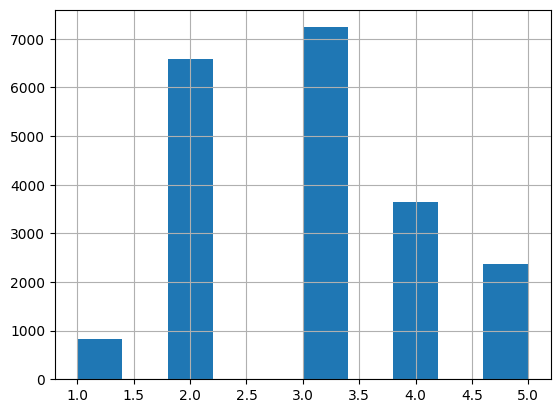

In [11]:
data["income_cat"].hist()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit 
split = StratifiedShuffleSplit(n_splits = 1,test_size=0.2,random_state=69)
for train_index, text_index in split.split(data,data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[text_index]


In [13]:
type(strat_test_set)

pandas.core.frame.DataFrame

In [14]:
strat_test_set["income_cat"].value_counts() /len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [15]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

Now as the sampling is completed , It's time to get rid of attribute called income_cat . His sole purpose was to help in stratified sampling oner random sampling

In [16]:
for set_ in (strat_test_set , strat_train_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [17]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14264,-117.10,32.69,35.0,1292.0,272.0,1183.0,272.0,2.0547,98000.0,NEAR OCEAN
18620,-122.03,37.00,30.0,2077.0,342.0,816.0,328.0,5.2078,440500.0,NEAR OCEAN
5895,-118.32,34.17,40.0,1868.0,356.0,799.0,403.0,2.9306,279300.0,<1H OCEAN
15473,-117.22,33.14,5.0,4576.0,848.0,2314.0,705.0,5.0123,210400.0,NEAR OCEAN
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY


In [18]:
data  = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

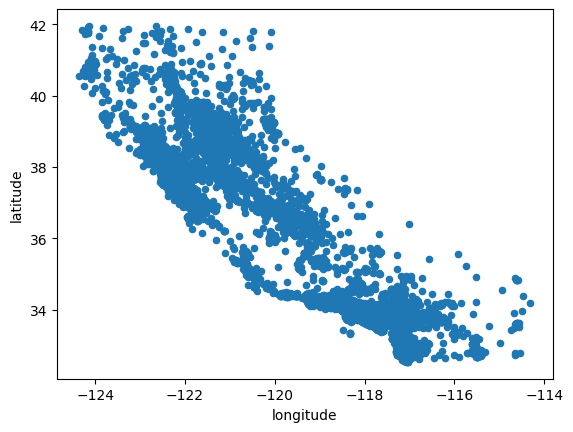

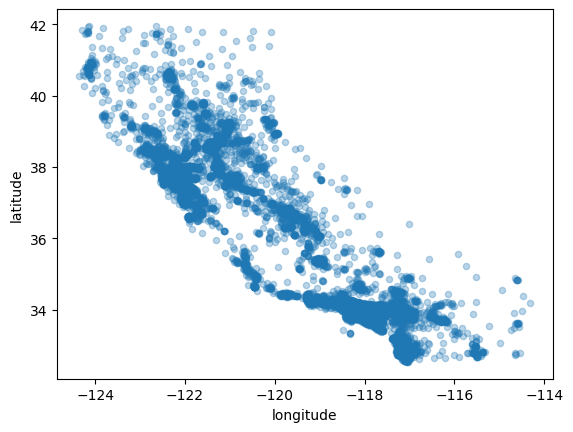

In [19]:
data.plot(kind="scatter",x="longitude",y="latitude")
data.plot(kind="scatter",x="longitude",y="latitude",alpha=0.3)

<Axes: xlabel='longitude', ylabel='latitude'>

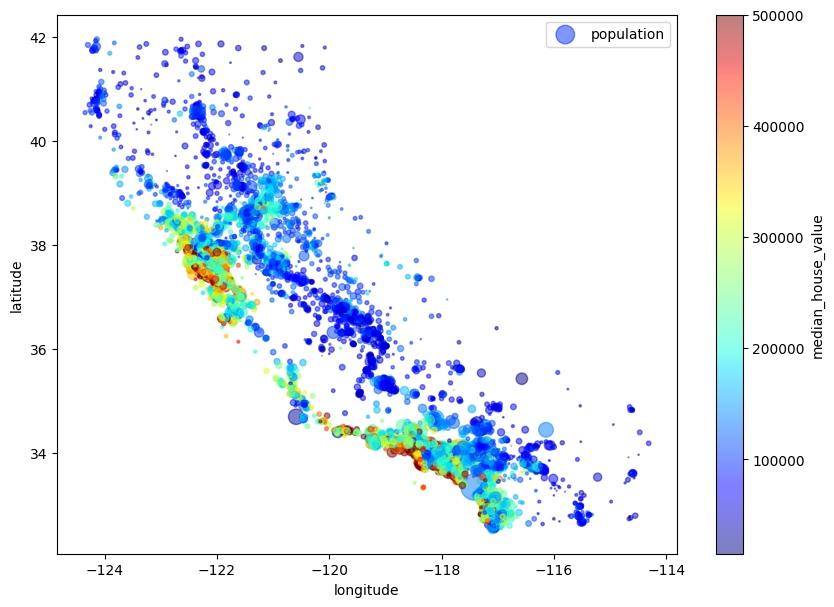

In [20]:
data.plot(kind="scatter",x="longitude",y="latitude",alpha=0.5,s=data["population"]/100 , label="population",figsize=(10,7)
,c="median_house_value",cmap=plt.get_cmap("jet") ,colorbar=True)

## Looking For Correlations 
Now we will see the correlations between the fields especially to the label field (hosuing_price in our case)

In [26]:
numeric_fields_data = data.drop("ocean_proximity",axis=1)
corr_matrix = numeric_fields_data.corr()
corr_matrix


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924359,-0.110149,0.045912,0.071038,0.104065,0.056315,-0.013361,-0.043728
latitude,-0.924359,1.000000,0.011964,-0.035166,-0.065639,-0.110502,-0.069893,-0.083147,-0.147151
housing_median_age,-0.110149,0.011964,1.000000,-0.357247,-0.315926,-0.297746,-0.298543,-0.116862,0.104379
total_rooms,0.045912,-0.035166,-0.357247,1.000000,0.928209,0.858484,0.916715,0.199840,0.138456
total_bedrooms,0.071038,-0.065639,-0.315926,0.928209,1.000000,0.875359,0.978822,-0.007267,0.054230
population,0.104065,-0.110502,-0.297746,0.858484,0.875359,1.000000,0.906805,0.005880,-0.021337
households,0.056315,-0.069893,-0.298543,0.916715,0.978822,0.906805,1.000000,0.013402,0.070768
median_income,-0.013361,-0.083147,-0.116862,0.199840,-0.007267,0.005880,0.013402,1.000000,0.688762
median_house_value,-0.043728,-0.147151,0.104379,0.138456,0.054230,-0.021337,0.070768,0.688762,1.000000


In [27]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688762
total_rooms           0.138456
housing_median_age    0.104379
households            0.070768
total_bedrooms        0.054230
population           -0.021337
longitude            -0.043728
latitude             -0.147151
Name: median_house_value, dtype: float64

### Here are the correlations results. It is the constant value ranges from -1 to 1
   - The closer to 1 means direct linear relation
   - Closer to 0 means no relations
   - Closer to -1 means indirect relations

Values Approaching to 1 and -1 can be useful . As they contain some relations .
These Correlations values are based on only linear relations . They cannot target non-linear relationships between values

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

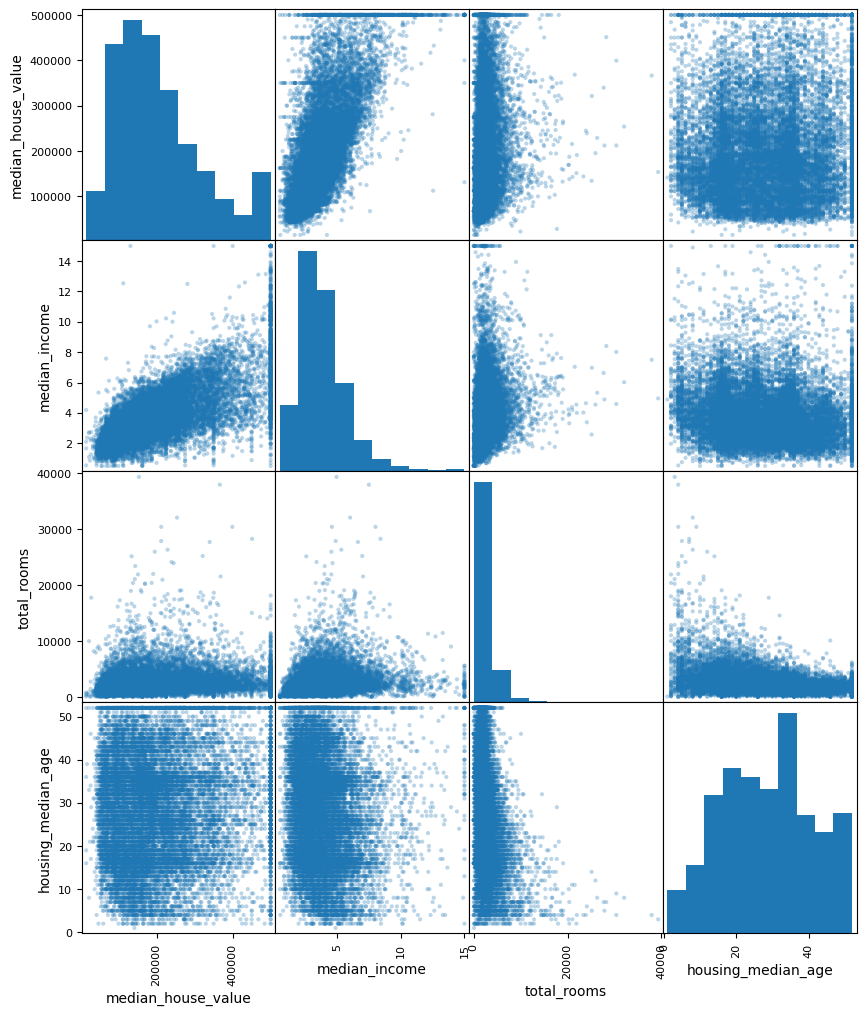

In [37]:
from pandas.plotting import scatter_matrix 
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(data[attributes],figsize=(10,12),alpha=0.3)

<Axes: xlabel='median_income', ylabel='median_house_value'>

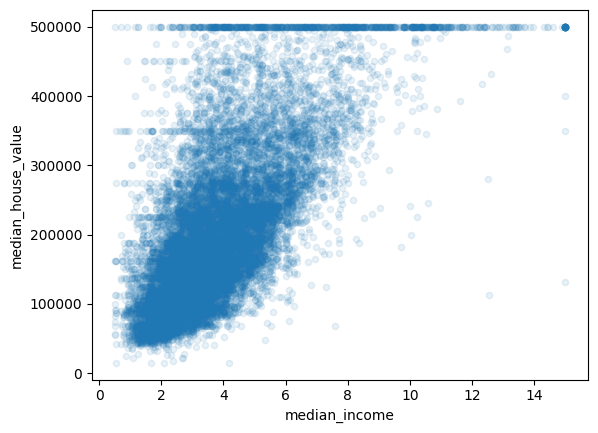

In [40]:
data.plot(kind="scatter",y="median_house_value",x="median_income",alpha=0.1)

**Observations**
- High number of people with low income chooses to leave in low medium district
- At 3-6 The relation is nearly 0 . The people are leaving in high valued houses and equally in low valued houses
- After 7 The rich people live in high value houses .

The data is capped at 50,000 . In other words , All the above values than 50k is brought to 50k (a baseline) That's why a line is visible. It is quite normal to have preprocessed data 

In [41]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

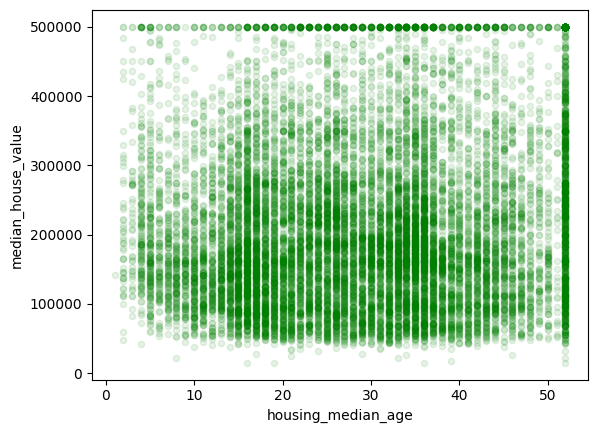

In [46]:
data.plot(kind="scatter",x="housing_median_age",y="median_house_value",alpha=0.1,color="green")

There is no sufficient relation can be found using these pairs

<Axes: xlabel='total_rooms', ylabel='median_house_value'>

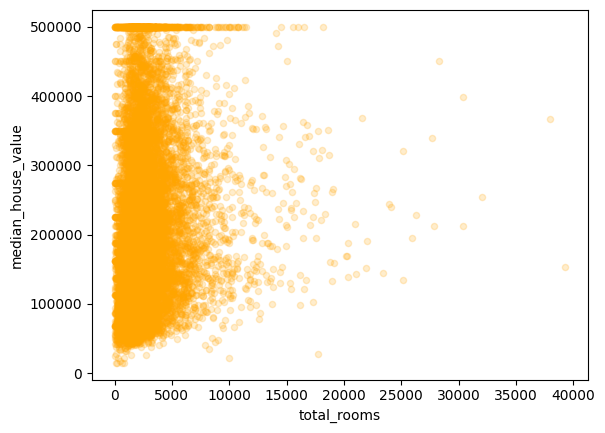

In [49]:
data.plot(kind="scatter",x="total_rooms",y="median_house_value",alpha=0.2,color="orange")

As we can see the realtion is not useful for us. Let's try creating new fields which can give useful realtions 

<Axes: xlabel='rooms_per_household', ylabel='median_house_value'>

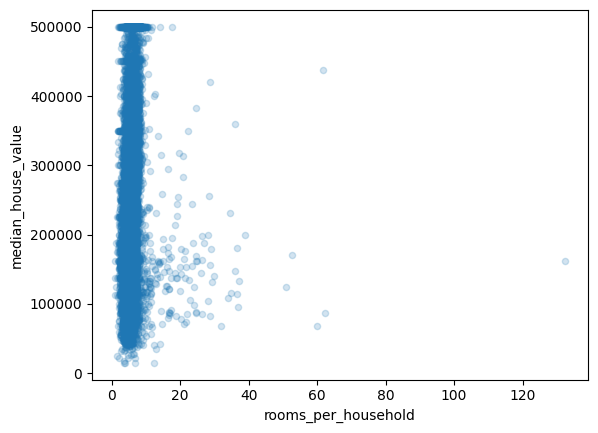

In [50]:
data["rooms_per_household"] = data["total_rooms"] / data["households"]
data.plot(kind="scatter",x="rooms_per_household",y="median_house_value",alpha=0.2)
